In [1]:
!pip install textblob

In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [3]:
# infile = 'news_clean_tokens.csv'

# with open(infile, 'r') as csvfile:
#     rows = csv.reader(csvfile)
    
df = pd.read_csv('news_clean_tokens.csv')
df.head()

,title,media,desc
0,"['shooting', '23rd', 'jackson', 'parking', 'lo...",CHS Capitol Hill Seattle,"['seattle', 'police', 'seattle', 'fire', 'call..."
1,"['five', 'easy', 'ways', 'increase', 'crime', ...",Newsmax,"['seattle', 'jason', 'rantz', 'published', 'an..."
2,"['new', 'chamber', 'commerce', 'seattle', 'int...",Q13 FOX,"['pl', 'davis', 'commander', 'collaborative', ..."
3,"['5', 'spd', 'officers', 'disciplined', 'poten...",Flipboard,"['seattle', 'office', 'police', 'accountabilit..."
4,"['city', 'may', 'relinquish', 'control', 'home...",PubliCola,"['3', 'seattle', '911', 'dispatch', 'center', ..."


<b> Finding Sentiments by Summary </b>


In [5]:
import csv
infile = 'news_clean_tokens.csv'

with open(infile, 'r') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        summary = row[0]
        blob = TextBlob(summary)
        print (summary)
        print (blob.sentiment.polarity, blob.sentiment.subjectivity)

title
0.0 0.0
['shooting', '23rd', 'jackson', 'parking', 'lot', 'sends', 'one']
0.0 0.0
['five', 'easy', 'ways', 'increase', 'crime', 'city']
0.43333333333333335 0.8333333333333334
['new', 'chamber', 'commerce', 'seattle', 'international', 'district']
0.06818181818181818 0.22727272727272727
['5', 'spd', 'officers', 'disciplined', 'potential', 'violation', 'election', 'laws']
0.0 1.0
['city', 'may', 'relinquish', 'control', 'homelessness', 'contracts']
0.0 0.0
['white', 'center', 'shooting', '16th', 'sw', 'kills', '2', 'west']
-0.05 0.05
['capitol', 'hill', 'reopening', 'pandemic', 'protests']
0.0 0.0
['opa', 'finds', 'spd', 'officers', 'violated', 'policy', 'using']
0.0 0.0
['morning', 'water', 'rescue', 'response', 'harbor', 'island']
0.0 0.0
['city', 'denies', 'permit', 'event', 'commemorating', 'art', 'chop']
0.0 0.0
['detectives', 'investigating', 'thursday', 'night', 'homicide', 'spd', 'blotter']
0.0 0.0
['rantz', 'multiple', 'eeo', 'city', 'complaints', 'filed', 'seattle', 'dept'

<b> Summarizing Sentiment - valance </b>
    
Dictionary of terms
    
valance = the polarity and subjectivity of a text
    
    
polarity = -1 to 1 (the emotion it carries)
    
    
subjectivity = 0 to 1 (0 being least subjective and 1 being most subjective)
   

Final summarized counts : [1, 0, 0]

 Pie Representation 
------------------


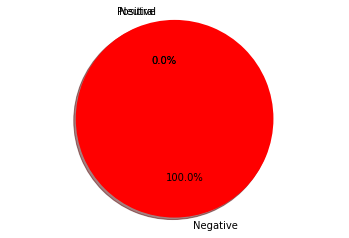

In [10]:
#categorize polarity into positive, neutral or negative
labels = ['Negative', 'Neutral', 'Positive']

#Initialize count array
values = [0,0,0]

#categorize each review
for summary in summary:
    sentiment = TextBlob(summary)
    
    #custom forula to convert polarity
    #0 - (Negative) 1=(Neutral) 2=(Positive)
    polarity = round((sentiment.polarity + 1) * 3) % 3
    
    #add the summary array
    values[polarity] = values[polarity] + 1
    
print('Final summarized counts :', values)

#For pie chart visualization
#set colors by label
colors = ["Red", "Green", "Blue"]

print("\n Pie Representation \n------------------")
#plot a pie chart
plt.pie(values, labels = labels, colors = colors, \
       autopct='%1.1f%%', shadow=True, startangle=100)
plt.axis('equal')
plt.show()

<b> Congrats, you have completed your sentiment analysis!